In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load


In [2]:
# import data

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

Epoch 1/164
28/28 - 2s - loss: 0.0485 - val_loss: 0.0551 - 2s/epoch - 56ms/step
Epoch 2/164
28/28 - 0s - loss: 0.0943 - val_loss: 0.3135 - 101ms/epoch - 4ms/step
Epoch 3/164
28/28 - 0s - loss: 0.1214 - val_loss: 0.0873 - 100ms/epoch - 4ms/step
Epoch 4/164
28/28 - 0s - loss: 0.0280 - val_loss: 0.1448 - 102ms/epoch - 4ms/step
Epoch 5/164
28/28 - 0s - loss: 0.0363 - val_loss: 0.0656 - 103ms/epoch - 4ms/step
Epoch 6/164
28/28 - 0s - loss: 0.0037 - val_loss: 0.0665 - 99ms/epoch - 4ms/step
Epoch 7/164
28/28 - 0s - loss: 0.0014 - val_loss: 0.0348 - 99ms/epoch - 4ms/step
Epoch 8/164
28/28 - 0s - loss: 0.0015 - val_loss: 0.0295 - 97ms/epoch - 3ms/step
Epoch 9/164
28/28 - 0s - loss: 0.0014 - val_loss: 0.0319 - 102ms/epoch - 4ms/step
Epoch 10/164
28/28 - 0s - loss: 8.4440e-04 - val_loss: 0.0344 - 105ms/epoch - 4ms/step
Epoch 11/164
28/28 - 0s - loss: 0.0012 - val_loss: 0.0318 - 98ms/epoch - 4ms/step
Epoch 12/164
28/28 - 0s - loss: 0.0019 - val_loss: 0.0265 - 101ms/epoch - 4ms/step
Epoch 13/164
28

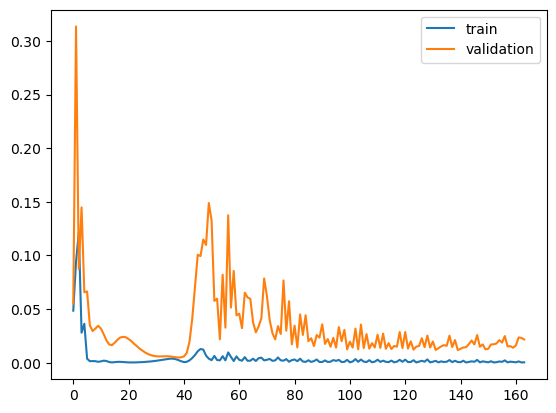

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 256)               147456    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 163969 (640.50 KB)
Trainable params: 163969 (640.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/Users/najwarujok/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.14717568201078152


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 164

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)



real price             real_price  real_price  real_price  real_price  real_price  \
2013-01-07   18.710714         NaN         NaN         NaN         NaN   
2013-01-08         NaN    18.76107         NaN         NaN         NaN   
2013-01-09         NaN         NaN   18.467857         NaN         NaN   
2013-01-10         NaN         NaN         NaN   18.696787         NaN   
2013-01-11         NaN         NaN         NaN         NaN   18.582144   
...                ...         ...         ...         ...         ...   
2019-12-23         NaN         NaN         NaN         NaN         NaN   
2019-12-24         NaN         NaN         NaN         NaN         NaN   
2019-12-26         NaN         NaN         NaN         NaN         NaN   
2019-12-27         NaN         NaN         NaN         NaN         NaN   
2019-12-30         NaN         NaN         NaN         NaN         NaN   

            real_price  real_price  real_price  real_price  real_price  ...  \
2013-01-07         Na

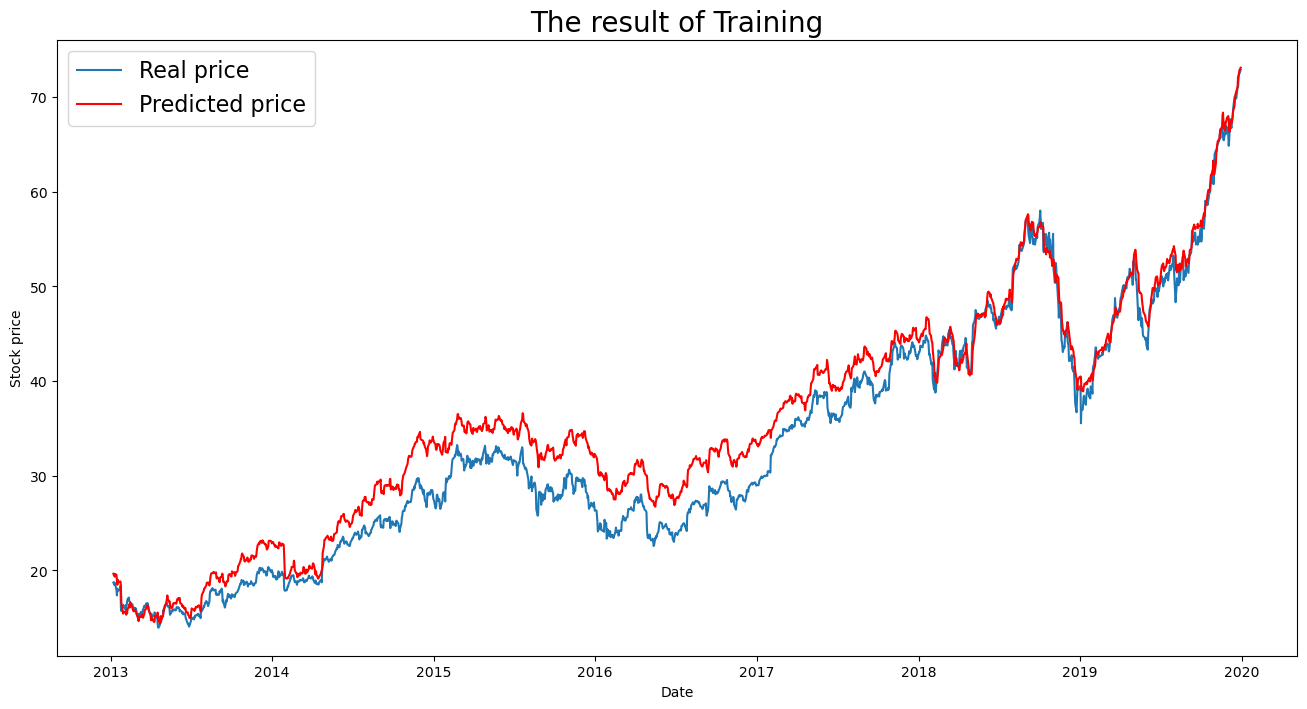

-- Train RMSE --  2.9330484119779854
-- MAE --  2.4669597970840593
-- R2 --  0.9464765119257262
-- MSLE --  0.009369742732772446
-- MAPE --  0.08787129250800506
real price             real_price  real_price  real_price  real_price  real_price  \
2013-01-07   18.710714         NaN         NaN         NaN         NaN   
2013-01-08         NaN    18.76107         NaN         NaN         NaN   
2013-01-09         NaN         NaN   18.467857         NaN         NaN   
2013-01-10         NaN         NaN         NaN   18.696787         NaN   
2013-01-11         NaN         NaN         NaN         NaN   18.582144   
...                ...         ...         ...         ...         ...   
2019-12-23         NaN         NaN         NaN         NaN         NaN   
2019-12-24         NaN         NaN         NaN         NaN         NaN   
2019-12-26         NaN         NaN         NaN         NaN         NaN   
2019-12-27         NaN         NaN         NaN         NaN         NaN   
2019-12-30    

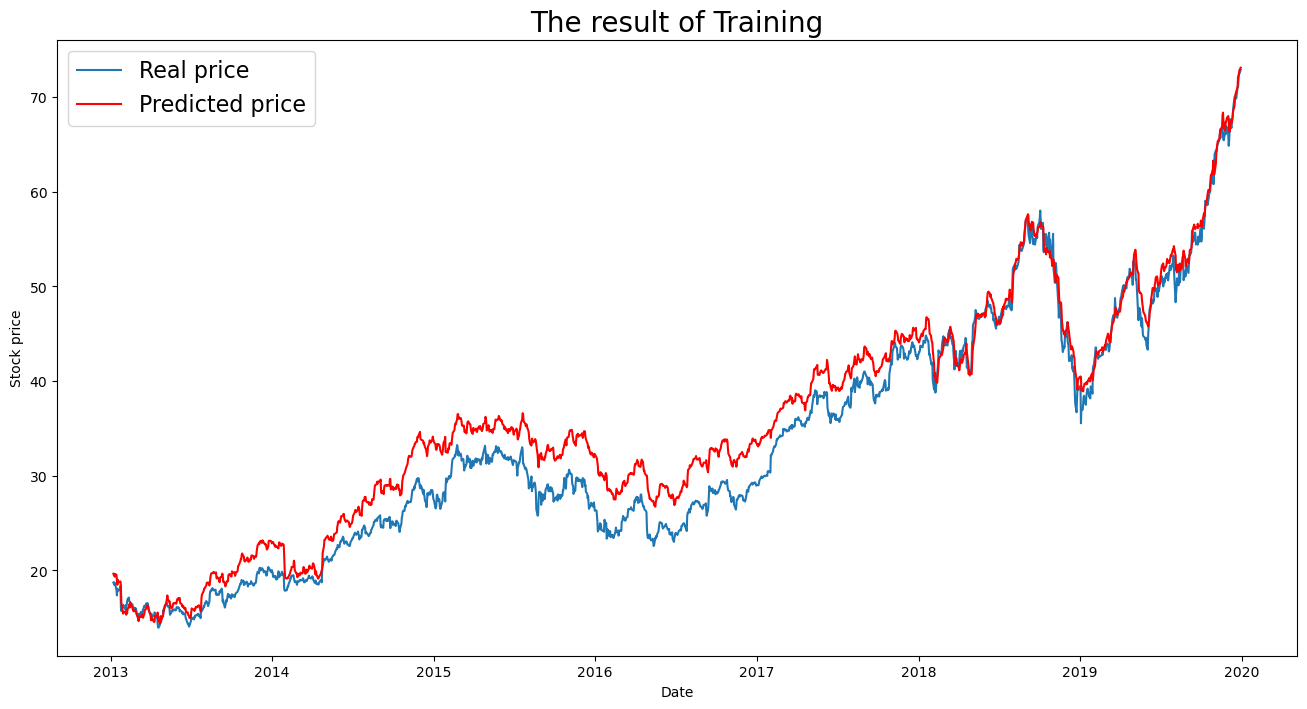

-- Train RMSE --  2.9330484119779854
-- MAE --  2.4669597970840593
-- R2 --  0.9464765119257262
-- MSLE --  0.009369742732772446
-- MAPE --  0.08787129250800506
----- Train_RMSE_LSTM ----- (            predicted_price  predicted_price  predicted_price  \
2013-01-07        19.654554              NaN              NaN   
2013-01-08              NaN        19.517067              NaN   
2013-01-09              NaN              NaN        19.500578   
2013-01-10              NaN              NaN              NaN   
2013-01-11              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-23              NaN              NaN              NaN   
2019-12-24              NaN              NaN              NaN   
2019-12-26              NaN              NaN              NaN   
2019-12-27              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   

            predicted_price  

In [9]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    print('real price', real_price)
    print('prediction', predict_result)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

    # Calculate MAE
    MAE = mean_absolute_error(real, predicted)
    print('-- MAE -- ', MAE)

    # Calculate R2
    R2 = r2_score(real, predicted)
    print('-- R2 -- ', R2)

    # Calculate MSLE
    MSLE = mean_squared_log_error(real, predicted)
    print('-- MSLE -- ', MSLE)

    # Calculate MAPE
    MAPE = mean_absolute_percentage_error(real, predicted)
    print('-- MAPE -- ', MAPE)

    return predict_result, RMSE, MAE, R2, MSLE, MAPE
    
train_predicted, train_RMSE, train_MAE, train_R2, train_MSLE, train_MAPE  = plot_traindataset_result(X_train, y_train)

train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

real price             real_price  real_price  real_price  real_price  real_price  \
2019-12-31   73.412498         NaN         NaN         NaN         NaN   
2020-01-02         NaN   75.087502         NaN         NaN         NaN   
2020-01-03         NaN         NaN   74.357498         NaN         NaN   
2020-01-06         NaN         NaN         NaN   74.949997         NaN   
2020-01-07         NaN         NaN         NaN         NaN   74.597504   
...                ...         ...         ...         ...         ...   
2022-12-23         NaN         NaN         NaN         NaN         NaN   
2022-12-27         NaN         NaN         NaN         NaN         NaN   
2022-12-28         NaN         NaN         NaN         NaN         NaN   
2022-12-29         NaN         NaN         NaN         NaN         NaN   
2022-12-30         NaN         NaN         NaN         NaN         NaN   

            real_price  real_price  real_price  real_price  real_price  ...  \
2019-12-31         Na

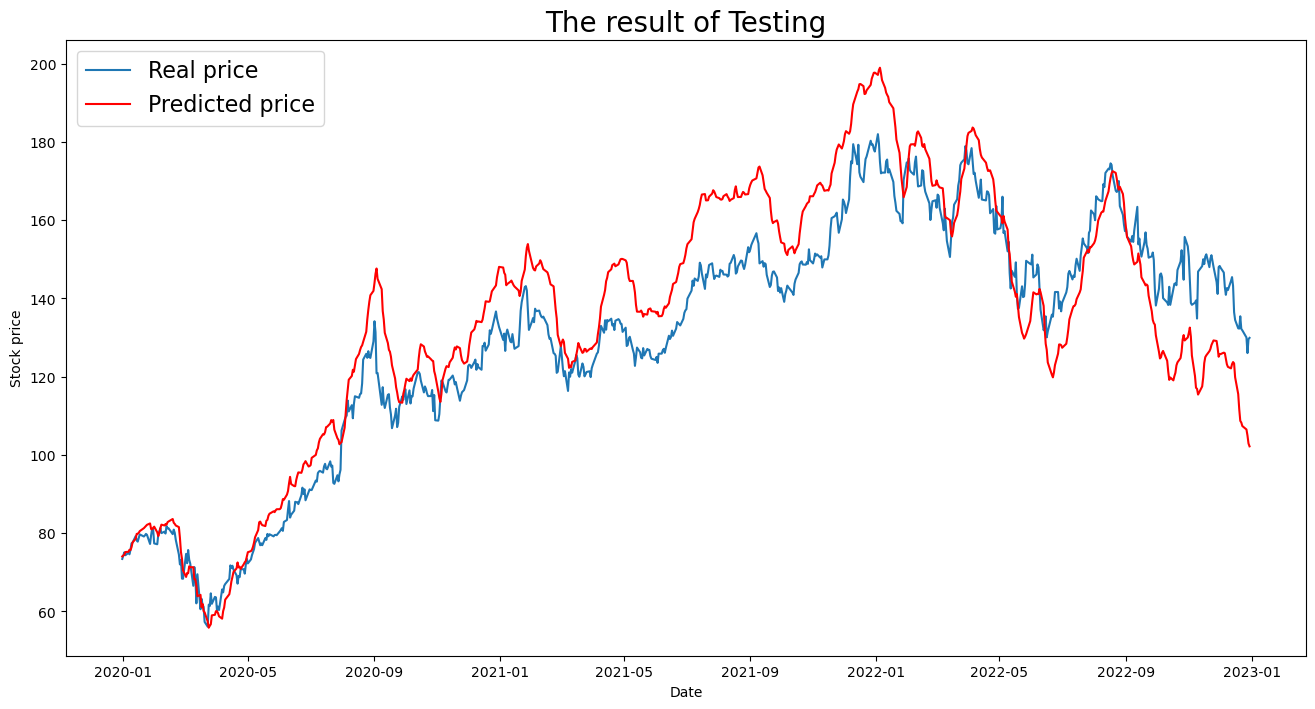

-- Test RMSE --  12.367356300925662
-- MAE --  10.371850192784946
-- R2 --  0.8376522610547337
-- MSLE --  0.007818356799223141
-- MAPE --  0.07767159508777165


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    # print('reschaled real y', rescaled_real_y)
    # print('rescaled predicted y', rescaled_predicted_y.shape[0])

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    print('real price', real_price)
    print('prediction', predict_result)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Test RMSE -- ', RMSE)

    # Calculate MAE
    MAE = mean_absolute_error(real, predicted)
    print('-- MAE -- ', MAE)

    # Calculate R2
    R2 = r2_score(real, predicted)
    print('-- R2 -- ', R2)

    # Calculate MSLE
    MSLE = mean_squared_log_error(real, predicted)
    print('-- MSLE -- ', MSLE)

    # Calculate MAPE
    MAPE = mean_absolute_percentage_error(real, predicted)
    print('-- MAPE -- ', MAPE)

    return predict_result, RMSE, MAE, R2, MSLE, MAPE

test_predicted, test_RMSE, test_MAE, test_R2, test_MSLE, test_MAPE = plot_testdataset_result(X_test, y_test)
test_predicted.to_csv("test_predicted_final.csv")



In [6]:
test_RMSE

22.741860864428798